<a href="https://colab.research.google.com/github/manjari-cse/Image-processing/blob/main/Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Lab -6 
## Image Segmentation

Image Segmentation deals with groupong of pixels belonging to distinct regions. It can either be done using Thresholding (or) Region based segmentation approaches

### Thresholding
Thresholding can be applied when the histogram is bimodal , (i.e) there is a clear separation of intensity values between foreground and background. Using the histogram, threshold can be selected either manually (or) using the auomated threshold detection algorithm

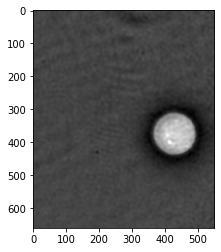

In [ ]:
#### Apply thershold using manual inspection
from skimage import data
from matplotlib import pyplot as plt
Image = data.cell()
plt.imshow(Image, cmap='gray')
plt.show()

(array([9.15500e+03, 2.25240e+04, 3.13447e+05, 5.58700e+03, 7.17000e+02,
        1.97500e+03, 2.94100e+03, 4.65400e+03, 1.81400e+03, 1.86000e+02]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

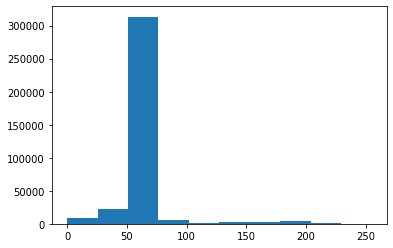

In [ ]:
plt.hist(Image.ravel())

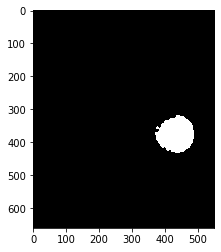

In [ ]:
T = 150

Thresholded_Image = Image>=150

#print(Thresholded_Image.shape)
plt.imshow(Thresholded_Image, cmap='gray')
plt.show()

Automated Thresholding Technique



1.   Consider x as T (Threshold)
2.   Group the pixels with value < T as background
3.   Group the pixels with value >=T as foreground
4.   Identify mean intensity for both classes (m1 and m2) 
5.   Compute global mean as average of m1 and m2
6.   Let global mean be new threshold
7.   Repeat steps from 2 to 6 until the difference between the thresholds is less than delT


In [ ]:
#### Apply thershold using manual inspection
from skimage import data
from matplotlib import pyplot as plt
Image = data.cell()
plt.imshow(Image, cmap='gray')
plt.show()

def find_global(I, T = 15):
  # Implement Find_gobal

### Otsu thresholding

Identify the global threshold automatically using the notion of clusters

In [ ]:
from skimage.filters import threshold_otsu
Image = data.cell()
thres = threshold_otsu(Image)
Thresholded_Image = Image>=thres
plt.imshow(Thresholded_Image, cmap='gray')
plt.show()

NameError: ignored

### Adaptive Thresholding

If the object suffers from non uniform illumination, then the global thresholding technique may not work properly. So, adaptive thresholding is used. It computes threshold for every patch separately 

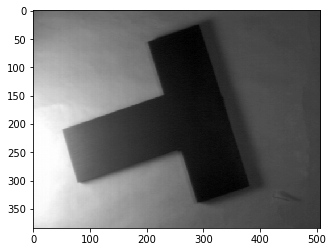

In [ ]:
from skimage.io import imread
I = imread('/content/sample.gif')
plt.imshow(I,cmap='gray')

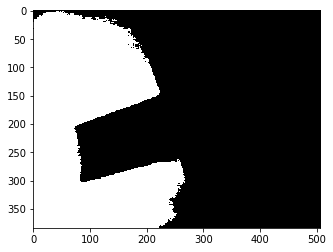

In [ ]:
thres = threshold_otsu(I)
Thresholded_Image = I>=thres
plt.imshow(Thresholded_Image, cmap='gray')
plt.show()

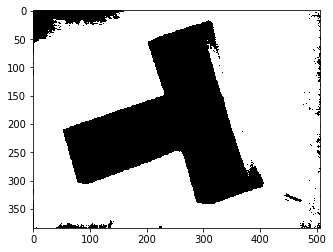

In [ ]:
from skimage.filters import threshold_local
block_size = 305
binary_adaptive = threshold_local(I, block_size, offset=5)
Thresholded_Image = I>=binary_adaptive
plt.imshow(Thresholded_Image, cmap='gray')
plt.show()

#Edge Detectors 

Edge Detection is carried out by performing the convolution operation on image with masks which are obtained by approximation of second order derivative opeartor.

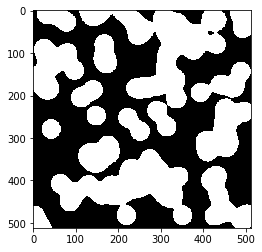

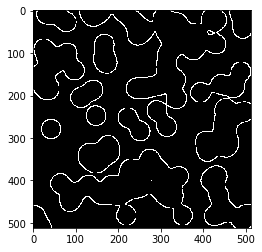

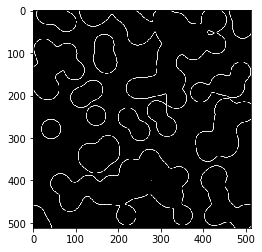

In [ ]:
# Detetion of Isolated Points
from skimage.io import imread
from scipy.ndimage.filters import convolve
from skimage.filters import sobel
from skimage.feature import canny
import numpy as np
I = data.binary_blobs()
plt.imshow(I,cmap='gray')
plt.show()
k = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]) # Defining filter
I1 = convolve(I, k, mode='constant', cval=0.0)
plt.imshow(I1,cmap='gray')
plt.show()
I2 = sobel(I)
plt.imshow(I2,cmap='gray')
plt.show()

In [ ]:
I3 = canny(I,sigma = 0.0)

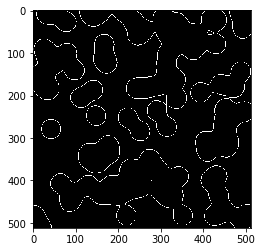

In [ ]:
plt.imshow(I3,cmap='gray')
plt.show()

Exercises

1. Implement find global function
2. Why double edges is detected when image is convolved with laplacian operator?
3. After edge detection, apply edge linking using Hough transform to obtain the exact boundary of the object.